# Part-1:

**Ingest the data: figure out a way to put the data in a structure so that you can query it.**

---
---

In [162]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# import data

df = pd.read_csv('/content/correct_twitter_201904.tab', sep = '\t')

In [164]:
# to show all the data

pd.set_option('display.max_columns', None)

In [165]:
# show data sample (3)

df.sample(3)

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,from_convo_search,directly_from_convo_search,from_timeline_search,directly_from_timeline_search,text,lang,author_id,author_handle,created_at,conversation_id,possibly_sensitive,reply_settings,source,author_follower_count,retweet_count,reply_count,like_count,quote_count,replied_to,replied_to_author_id,replied_to_handle,replied_to_follower_count,quoted,quoted_author_id,quoted_handle,quoted_follower_count,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id
80509,1124054708841340930,britney_201904,2022-02-28 09:46:31.374298-05:00,2022-02-28 09:46:31.374298-05:00,True,False,False,False,False,False,False,False,False,False,What non country song would you like me to cou...,en,2928756501,calebleemusic,2019-05-02 16:55:01-04:00,1124054708841340930,False,everyone,Twitter for iPhone,63044,16,231,396,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34497,1129111741345009665,britney_201904,2022-02-28 09:38:48.270689-05:00,2022-02-28 09:38:48.270689-05:00,True,False,False,False,False,False,False,False,False,False,Io quando @giuseppesecret mi manda il DM del B...,it,34196694,cottytorino,2019-05-16 15:49:51-04:00,1129111741345009665,False,everyone,Twitter for iPhone,5596,1,2,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'end': 87, 'url': 'https://t.co/7HclAgVB0P',...",['7_1129111533190090753'],419060023b8455e1
35689,1129084086805565440,britney_201904,2022-02-28 09:39:03.877645-05:00,2022-02-28 09:39:03.877645-05:00,True,True,False,False,False,False,False,False,False,False,RT @codyspearz: Britney Spears released Baby O...,en,915735065405124608,bryannspears,2019-05-16 13:59:58-04:00,1129084086805565440,False,everyone,Twitter for iPhone,1412,199,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1128801211262558208.0,44449296.0,codyspearz,10184.0,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
# setting float format into only 1 decimals points
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [167]:
# check statistics of the data

df.describe()

,id,author_id,conversation_id,author_follower_count,retweet_count,reply_count,like_count,quote_count,replied_to,replied_to_author_id,replied_to_follower_count,quoted,quoted_author_id,quoted_follower_count,retweeted,retweeted_author_id,retweeted_follower_count,mentioned_author_ids,mentioned_handles
count,88037.0,88037.0,88037.0,88037.0,88037.0,88037.0,88037.0,88037.0,6675.0,3850.0,3850.0,2052.0,1776.0,1776.0,51529.0,51529.0,51529.0,0.0,0.0
mean,1128375479684124672.0,284068488447639744.0,1128223259820943744.0,58719.7,613.8,8.7,164.3,9.8,1127070052663771264.0,263641831063934272.0,1018013.2,1124362908063896064.0,148943245373475360.0,2149496.8,1123201030833017088.0,256121195758411808.0,1589441.4,NaN,NaN
std,3001478860099059.5,437629710113161856.0,7439132012984094.0,1200196.1,4047.9,382.7,8811.5,470.5,22863994396206500.0,430165149519075776.0,6457767.9,43429007519451088.0,349649911392004608.0,8885741.7,61336471324527568.0,435159825004209984.0,5231865.1,NaN,NaN
min,1101535059457257472.0,13573.0,159797250762092544.0,0.0,0.0,0.0,0.0,0.0,159797250762092544.0,661613.0,0.0,35767743634481152.0,759251.0,9.0,1572632015.0,8943.0,0.0,NaN,NaN
25%,1126285311233884160.0,214808471.0,1126256604557467648.0,214.0,0.0,0.0,0.0,0.0,1125241025516134400.0,72962551.2,517.0,1126941960936275968.0,27258159.5,7012.0,1126079923683233792.0,22650211.0,5042.0,NaN,NaN
50%,1128714190309416960.0,1635682992.0,1128708506008399872.0,595.0,20.0,0.0,0.0,0.0,1128013568652169216.0,636111390.0,2780.0,1127323390948304896.0,372483103.0,10605.0,1128477600643469312.0,478658224.0,22760.0,NaN,NaN
75%,1130295877787103232.0,786091574669246464.0,1130280710512750592.0,1761.0,286.0,0.0,0.0,0.0,1130908710910478336.0,761602330189928448.0,26270.0,1128953520468577280.0,932842621.0,503370.0,1129886212003700736.0,733959188829741056.0,879759.0,NaN,NaN
max,1134308495992299520.0,1134151220027887616.0,1134308495992299520.0,114307457.0,415500.0,81701.0,1368193.0,76727.0,1134300518501761024.0,1132512769088135168.0,114307457.0,1134307740128387072.0,1130235495345283072.0,114307449.0,1134303666830172160.0,1133220642294157312.0,71417457.0,NaN,NaN


In [168]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88037 entries, 0 to 88036
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             88037 non-null  int64  
 1   event                          88037 non-null  object 
 2   ts1                            88037 non-null  object 
 3    ts2                           88037 non-null  object 
 4   from_stream                    88037 non-null  bool   
 5   directly_from_stream           88037 non-null  bool   
 6   from_search                    88037 non-null  bool   
 7   directly_from_search           88037 non-null  bool   
 8   from_quote_search              88037 non-null  bool   
 9   directly_from_quote_search     88037 non-null  bool   
 10  from_convo_search              88037 non-null  bool   
 11  directly_from_convo_search     88037 non-null  bool   
 12  from_timeline_search           88037 non-null 

In [169]:
# check for null values in the data

df.isnull().sum()

,0
id,0
event,0
ts1,0
ts2,0
from_stream,0
directly_from_stream,0
from_search,0
directly_from_search,0
from_quote_search,0
directly_from_quote_search,0


In [170]:
# check duplicated values

df.duplicated().sum()

0

In [171]:
# print all the columns' name

print(df.columns)

Index(['id', 'event', 'ts1', ' ts2', 'from_stream', 'directly_from_stream',
       'from_search', 'directly_from_search', 'from_quote_search',
       'directly_from_quote_search', 'from_convo_search',
       'directly_from_convo_search', 'from_timeline_search',
       'directly_from_timeline_search', 'text', 'lang', 'author_id',
       'author_handle', 'created_at', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'source', 'author_follower_count', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'replied_to',
       'replied_to_author_id', 'replied_to_handle',
       'replied_to_follower_count', 'quoted', 'quoted_author_id',
       'quoted_handle', 'quoted_follower_count', 'retweeted',
       'retweeted_author_id', 'retweeted_handle', 'retweeted_follower_count',
       'mentioned_author_ids', 'mentioned_handles', 'hashtags', 'urls',
       'media_keys', 'place_id'],
      dtype='object')


In [172]:
# delete unnecessary columns

df = df.drop(['id', 'event', 'ts1', ' ts2', 'from_stream', 'directly_from_stream',
       'from_search', 'directly_from_search', 'from_quote_search',
       'directly_from_quote_search', 'from_convo_search',
       'directly_from_convo_search', 'from_timeline_search',
       'directly_from_timeline_search', 'lang', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'source', 'author_follower_count', 'retweet_count',
       'reply_count',  'quote_count', 'replied_to',
       'replied_to_author_id', 'replied_to_handle',
       'replied_to_follower_count', 'quoted', 'quoted_author_id',
       'quoted_handle', 'quoted_follower_count', 'retweeted',
       'retweeted_author_id', 'retweeted_handle', 'retweeted_follower_count',
       'mentioned_author_ids', 'mentioned_handles',
       'urls', 'media_keys',], axis=1)

#  remaining columns = 'text', 'author_id', 'author_handle', 'created_at','like_count','hashtags', 'place_id'

In [173]:
# Replace 'NaN' string with actual NaN values
df.replace('NaN', np.nan, inplace=True)

# Replace all NaN values with an empty string
df.fillna('', inplace=True)

In [174]:
# create 2 separate columns for Date & Time

df[['Date', 'Time']] = df['created_at'].str.split(' ', expand=True)
df = df.drop('created_at', axis=1)

In [175]:
# Correct Time column's values

df['Time'] = df['Time'].str.split('-').str[0]

In [176]:
# Correct Date & Time format

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [177]:
# Create a new 'Hour' column

df['Hour'] = df['Time'].apply(lambda x: x.hour)

In [178]:
# check cleaned dataset

df

,text,author_id,author_handle,like_count,hashtags,place_id,Date,Time,Hour
0,RT @Iesbwian: britney spears was right.....my ...,1620294025,whoevermalenais,0,,,2019-05-23,12:17:17,12
1,TJ trusts me to make a playlsit for our 5 hour...,34706181,Briannabaez08,1,,,2019-05-23,12:17:21,12
2,"@badgurlhenri you better work bitch - spears,...",1784620956,putz_larissa,1,,,2019-05-23,11:56:32,11
3,RT @Iesbwian: britney spears was right.....my ...,3410399002,hisamazingvoice,0,,,2019-05-23,12:17:05,12
4,RT @Iesbwian: britney spears was right.....my ...,1098239071837515781,sugahunnay,0,,,2019-05-23,12:16:42,12
...,...,...,...,...,...,...,...,...,...
88032,RT @ITSPARISBXTCH: ladies and gentlemen let me...,927328349504065536,clavtomlinsoffx,0,,,2019-04-29,17:33:40,17
88033,RT @keanuorange: Pop stars hairstyles per era:...,1531266667,gipertomisha,0,,,2019-04-29,17:33:36,17
88034,can only think about Britney Jean Spears today...,34953086,gay_trickery,3,,,2019-04-29,17:32:37,17
88035,RT @TheBlastNews: Music video director David L...,1212518893,vace_omg,0,,,2019-04-29,17:32:06,17


# Part-2:

**Construct functionality that allows you to query the data. If I search for a term, like “music,” I would like to know some subset of the following:**

- How many tweets were posted containing the term on each day?
- How many unique users posted a tweet containing the term?
- How many likes did tweets containing the term get, on average?
- Where (in terms of place IDs) did the tweets come from?
- What times of day were the tweets posted at?
- Which user posted the most tweets containing the term?

---
---


In [179]:
# Q1. How many tweets were posted containing the term on each day

df_music = df[df['text'].str.contains('music')].groupby('Date').size().reset_index(name='count')
print(df_music)

         Date  count
0  2019-03-12      1
1  2019-04-06      1
2  2019-04-14      1
3  2019-04-16      1
4  2019-04-24      1
5  2019-04-26      2
6  2019-04-27      2
7  2019-04-28     24
8  2019-04-29     40
9  2019-04-30     40
10 2019-05-01     45
11 2019-05-02     47
12 2019-05-03     52
13 2019-05-04     36
14 2019-05-05     52
15 2019-05-06     33
16 2019-05-07     41
17 2019-05-08     38
18 2019-05-09    150
19 2019-05-10    173
20 2019-05-11     52
21 2019-05-12     33
22 2019-05-13     29
23 2019-05-14     42
24 2019-05-15     73
25 2019-05-16     62
26 2019-05-17    135
27 2019-05-18     40
28 2019-05-19     23
29 2019-05-20     62
30 2019-05-21     87
31 2019-05-22     78
32 2019-05-23     42
33 2019-05-24     27
34 2019-05-25     76
35 2019-05-26     78
36 2019-05-27     47
37 2019-05-28    124
38 2019-05-29    100
39 2019-05-30     48


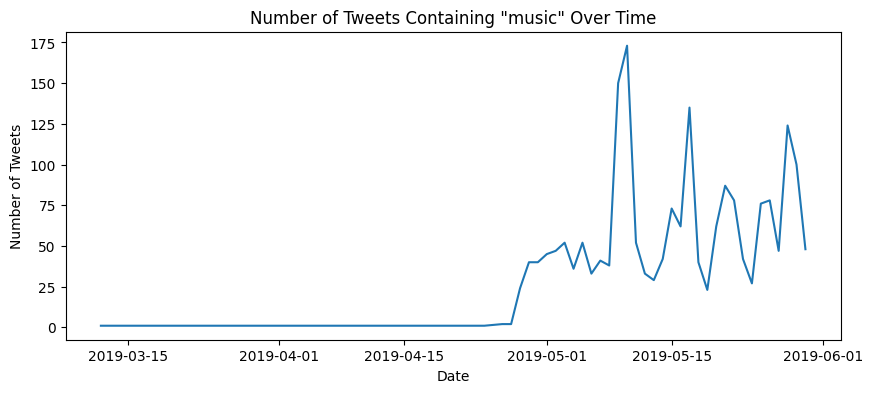

In [180]:
# Q1. How many tweets were posted containing the term on each day (Chart)

df_music = df[df['text'].str.contains('music')].groupby('Date').size().reset_index(name='count')
plt.figure(figsize = (10,4))
plt.plot(df_music['Date'], df_music['count'])
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Containing "music" Over Time')
plt.show()

In [181]:
# Q2. How many unique users posted a tweet containing the term

df[df['text'].str.contains('music')]['author_handle'].nunique()

1563

In [182]:
# Q3. How many likes did tweets containing the term get, on average?

df[df['text'].str.contains('music')]['like_count'].mean()

234.05348380765457

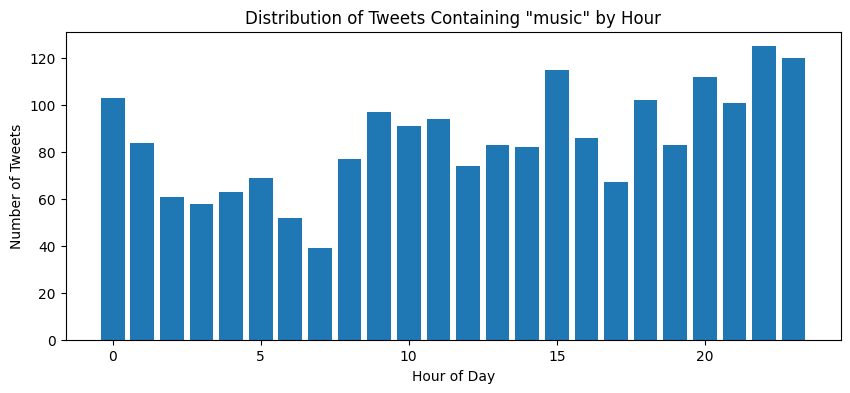

In [184]:
# Q5. What times of day were the tweets posted at

hourly_tweets = df[df['text'].str.contains('music')]['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
plt.bar(hourly_tweets.index, hourly_tweets.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets Containing "music" by Hour')
plt.show()

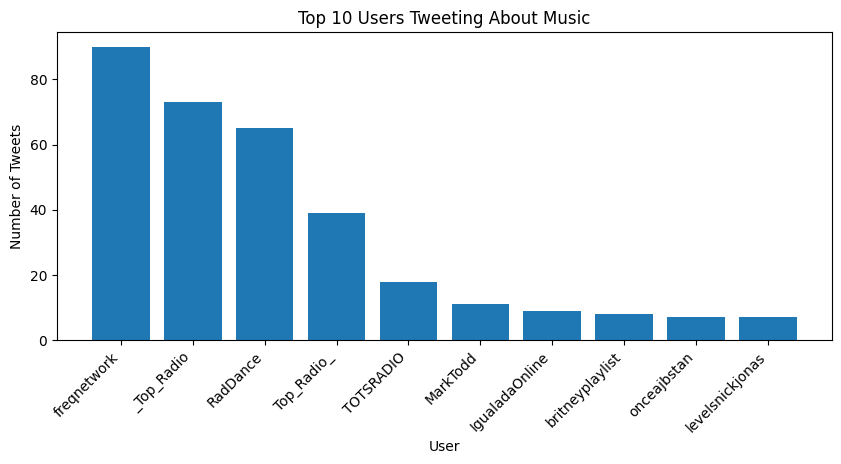

In [185]:
# Q6. Top 10 users posted a tweet containing the term

top_users = df[df['text'].str.contains('music')]['author_handle'].value_counts().nlargest(10)
plt.figure(figsize=(10, 4))
plt.bar(top_users.index, top_users.values)
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Users Tweeting About Music')
plt.xticks(rotation=45, ha='right')
plt.show()